In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from scipy import stats

Task1

In [2]:
n=12
k=11
G=nx.random_regular_graph(k,n)

In [3]:
list(nx.find_cliques(G))

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]

In [4]:
n=20
cl_num=[]
for k in range(0,n):
    for i in list(nx.find_cliques(nx.random_regular_graph(k,n))):
        a=len(i)
        if cl_num.count(a) == 0:
            cl_num.append(a)
print ('При n=',n,' возможны кликовые числа: ', cl_num)

При n= 20  возможны кликовые числа:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]


Task 2

In [5]:
data = pd.read_csv('p2p-Gnutella04.txt', sep="\t",)
data

,FromNodeId,ToNodeId
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
39989,10874,3251
39990,10874,5543
39991,10874,9711
39992,10874,10875


In [6]:
'''
Dataset statistics
Nodes 	10876
Edges 	39994
Nodes in largest WCC 	10876 (1.000)
Edges in largest WCC 	39994 (1.000)
Nodes in largest SCC 	4317 (0.397)
Edges in largest SCC 	18742 (0.469)
Average clustering coefficient 	0.0062
Number of triangles 	934
Fraction of closed triangles 	0.001807
Diameter (longest shortest path) 	9
90-percentile effective diameter 	5.4
'''

'\nDataset statistics\nNodes \t10876\nEdges \t39994\nNodes in largest WCC \t10876 (1.000)\nEdges in largest WCC \t39994 (1.000)\nNodes in largest SCC \t4317 (0.397)\nEdges in largest SCC \t18742 (0.469)\nAverage clustering coefficient \t0.0062\nNumber of triangles \t934\nFraction of closed triangles \t0.001807\nDiameter (longest shortest path) \t9\n90-percentile effective diameter \t5.4\n'

In [7]:
G = nx.from_pandas_edgelist(data, source="FromNodeId", target="ToNodeId")

In [8]:
tc=0
for v in G.nodes():
    for u,w in combinations(G.neighbors(v), 2):
        if G.has_edge(u,w): tc+=1
print('Число треугольников: ',int(tc/3))

Число треугольников:  934


In [9]:
tc=0
edges = list(G.edges())
for i in edges:
    gu = set(G.neighbors(i[0]))
    gv = set(G.neighbors(i[1]))
    p=gu & gv
    #print(p)
    tc+=len(p)
int(tc/3)

934

In [20]:
tc = 0
nodes = list(G.nodes())
p = 4
nod=[]
siz=int(len(nodes)/p)


Task 3

In [35]:
G1=nx.subgraph(G, nodes[0:99])
# Для всего графа надолго зависает считать
print('Средняя длина пути: ', nx.average_shortest_path_length(G1))
print('Локальный коэф кластеризации вершины 0: ', nx.clustering(G1,0))
print('Глобальный коэф кластеризации: ', nx.transitivity(G1))
print('Средняя степень вершин: ', nx.average_degree_connectivity(G1))

Средняя длина пути:  3.857555143269429
Локальный коэф кластеризации вершины 0:  0.022222222222222223
Глобальный коэф кластеризации:  0.039735099337748346
Средняя степень вершин:  {10: 5.3, 11: 2.659090909090909, 2: 7.538461538461538, 12: 3.0833333333333335, 1: 11.028571428571428, 4: 6.75, 6: 4.5, 3: 7.333333333333333, 5: 5.2}


Task 4

/usr/lib/python3/dist-packages/scipy/sparse/_base.py:742: VisibleDeprecationWarning: Please use `.todense()` instead
  warn(np.VisibleDeprecationWarning(


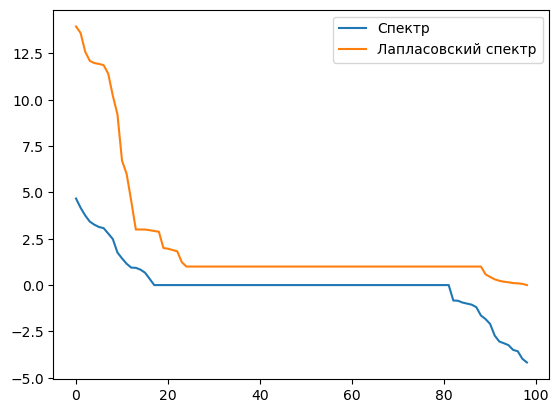

In [36]:
adj_matrix = nx.adjacency_matrix(G1) 
eigenvalues = np.linalg.eigvals(adj_matrix.A) 
eigenvalues_sorted = np.sort(eigenvalues)[::-1]
g_spectrum = np.array(sorted(nx.spectrum.adjacency_spectrum(G1).real, reverse=True))
g_lapl_spectrum = sorted(nx.spectrum.laplacian_spectrum(G1).real, reverse=True) 
plt.plot(g_spectrum, label='Спектр')
plt.plot(g_lapl_spectrum, label='Лапласовский спектр')
plt.legend()

In [37]:
spectral_gap = eigenvalues_sorted[0] - eigenvalues_sorted[1] 
spectral_radius = np.max(np.abs(eigenvalues)) 
spectral_moment = lambda k: sum(eigenvalues ** k) 

print(f'\nСпектральный разрыв: {spectral_gap}')
print(f'\nСпектральный радиус: {spectral_radius}')
print(f'\nПервый спектральный момент: {spectral_moment(1)}')
print(f'\nВторой спектральный момент: {spectral_moment(2)}')


Спектральный разрыв: (0.500961282751434+0j)

Спектральный радиус: 4.671608873468373

Первый спектральный момент: (-2.0022651545335033e-14+0j)

Второй спектральный момент: (230.00000000000006+0j)


Task 5

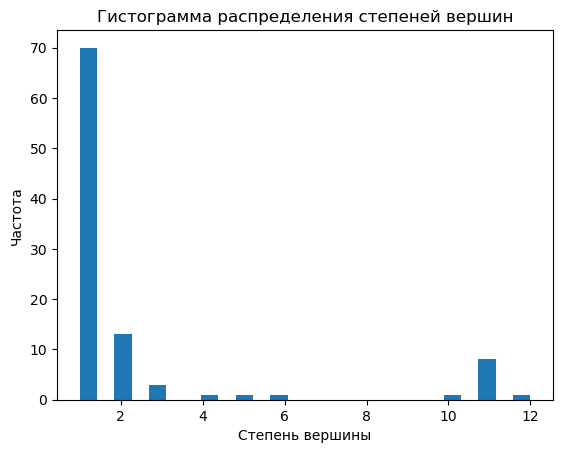

In [39]:
degrees = [G1.degree(node) for node in G1.nodes()]
x = range(1, max(degrees)+1)

plt.hist(degrees, bins='auto')
plt.xlabel('Степень вершины')
plt.ylabel('Частота')
plt.title('Гистограмма распределения степеней вершин')
plt.show()

In [44]:
mu = np.mean(degrees) 
poisson = stats.poisson(mu)
x = np.arange(4, 9)

mu_moment = np.mean(degrees)
print("Оценка параметра mu методом моментов:", mu_moment)

mu_mle = np.mean(degrees)
print("Оценка параметра mu методом максимального правдоподобия:", mu_mle)

D, p_value = stats.kstest(degrees, poisson.cdf)
print("Значение статистики Колмогорова-Смирнова:", D)

Оценка параметра mu методом моментов: 2.323232323232323
Оценка параметра mu методом максимального правдоподобия: 2.323232323232323
Значение статистики Колмогорова-Смирнова: 0.38153867800973074
